In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
# matplotlib style
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family'] = "BM Hanna Pro"
plt.rcParams["figure.figsize"] = (12, 6)

# seaborn style
sns.set_theme(style='whitegrid', font='BM Hanna Pro', palette='pastel', rc={'figure.figsize': (10, 6)})
"""


sns.set_theme(
    style='white',       # 배경 스타일 (grid 포함)
    font='BM Hanna Pro',     # 폰트
    palette='pastel',        # 색상 테마
    rc={
        'axes.unicode_minus': False,  # 마이너스 기호 깨짐 방지
        'figure.figsize': (12, 6),    # 그래프 크기 설정
        'axes.labelsize': 14,         # 축 레이블 크기
        'xtick.labelsize': 12,        # x축 눈금 크기
        'ytick.labelsize': 12,        # y축 눈금 크기
        'legend.fontsize': 12,        # 범례 폰트 크기
        'axes.titleweight': 'bold',   # 제목 굵게
        'axes.titlesize': 16          # 제목 크기
    }
)

%config InlineBackend.figure_format = 'retina'

In [33]:
sns_df = pd.read_csv("../data/social_media_stocks.csv")
sns_df.tail(10)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
8388,2022-04-05,FB,231.839996,231.839996,236.860001,231.020004,234.080002,29727200.0
8389,2022-04-05,TWTR,50.980000,50.980000,54.570000,50.560001,53.849998,217520100.0
8390,2022-04-05,PINS,26.129999,26.129999,27.510000,26.100000,27.400000,8061500.0
8391,2022-04-05,SNAP,38.250000,38.250000,39.799999,37.820000,39.500000,22261200.0
8392,2022-04-05,ETSY,130.210007,130.210007,136.869995,128.610001,135.419998,3280000.0
8393,2022-04-06,FB,223.300003,223.300003,228.990005,221.410004,226.910004,28969100.0
8394,2022-04-06,TWTR,50.770000,50.770000,52.869999,49.299999,50.040001,158865600.0
8395,2022-04-06,PINS,24.440001,24.440001,25.559999,23.870001,25.559999,12274200.0
8396,2022-04-06,SNAP,36.470001,36.470001,37.740002,35.639999,37.369999,21549700.0
8397,2022-04-06,ETSY,125.470001,125.470001,128.229996,121.389999,128.179993,3521700.0


In [34]:
# Year 분리
sns_df['Year'] =sns_df['Date'].str.split('-', expand=True)[0]
print(sns_df['Year'])
print()

# 기업별 연도별 평균 주식 종가 계산
sns_close_df = sns_df.groupby(['Year', 'Symbol'])[['Close']].mean().reset_index()
print(sns_close_df)
print()

# Meta(Facebook)와 X(Twitter) 데이터 각각 저장
fb_stock_close = sns_close_df.query('Symbol == "FB"')
twtr_stock_close = sns_close_df.query('Symbol == "TWTR"')
print(fb_stock_close)
print()
print(twtr_stock_close)
print()

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
8393    2022
8394    2022
8395    2022
8396    2022
8397    2022
Name: Year, Length: 8398, dtype: object

    Year Symbol       Close
0   2012     FB   24.673097
1   2013     FB   35.481151
2   2013   TWTR   49.657568
3   2014     FB   68.762341
4   2014   TWTR   45.451508
5   2015   ETSY   14.775967
6   2015     FB   88.772857
7   2015   TWTR   35.344325
8   2016   ETSY   10.651587
9   2016     FB  117.035873
10  2016   TWTR   17.571111
11  2017   ETSY   14.398904
12  2017     FB  156.576175
13  2017   SNAP   17.004550
14  2017   TWTR   17.823506
15  2018   ETSY   37.128765
16  2018     FB  171.510956
17  2018   SNAP   11.780080
18  2018   TWTR   32.828526
19  2019   ETSY   57.800774
20  2019     FB  181.637500
21  2019   PINS   26.205449
22  2019   SNAP   12.919841
23  2019   TWTR   35.575476
24  2020   ETSY   98.046858
25  2020     FB  234.550870
26  2020   PINS   33.054941
27  2020   SNAP   24.582174
28  

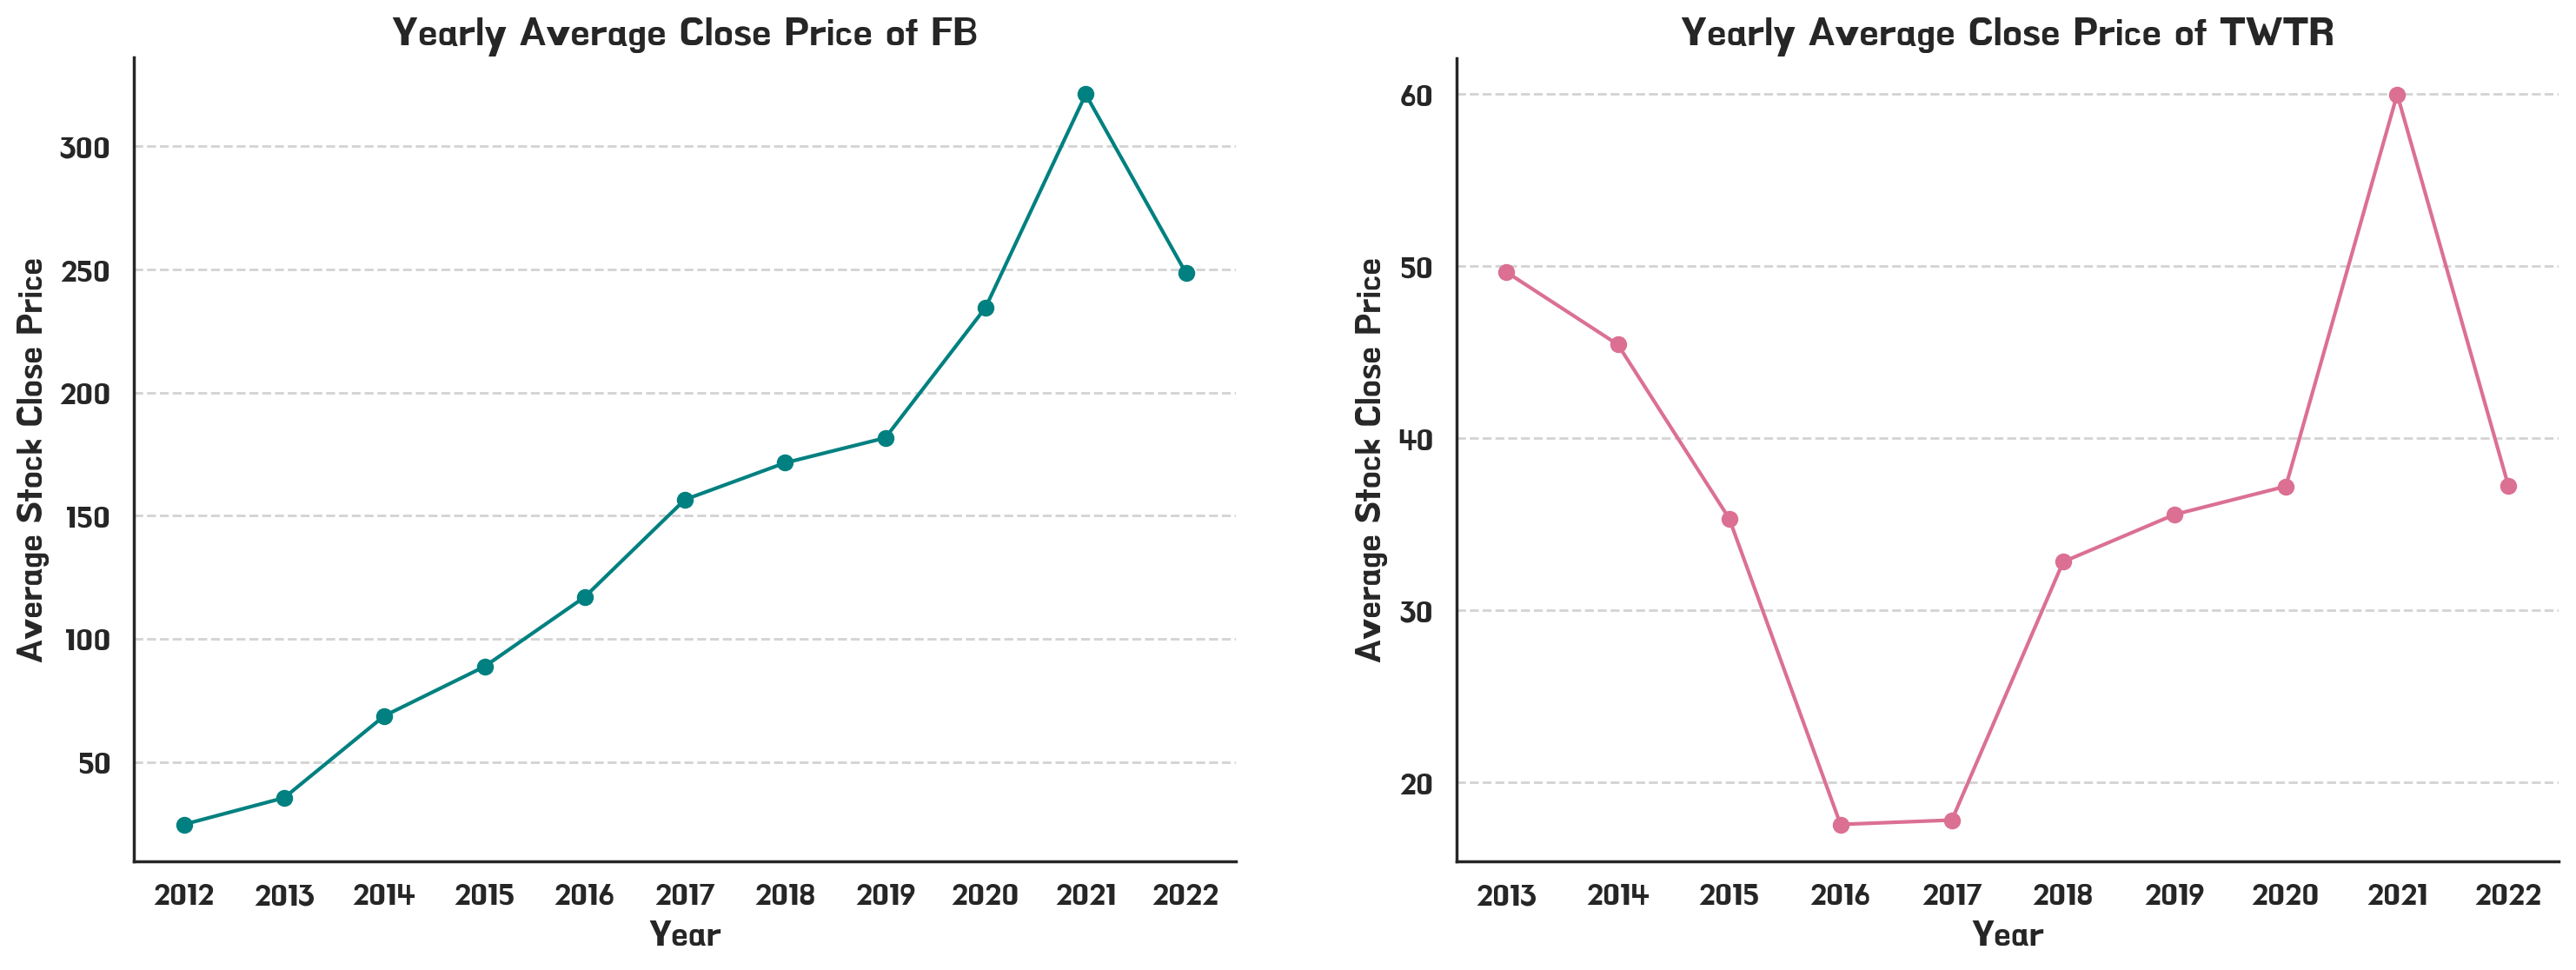

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(fb_stock_close['Year'], fb_stock_close['Close'], color='teal', marker='o')
axes[0].set_title('Yearly Average Close Price of FB')
# axes[0].set_xlabel('Year')
# axes[0].set_ylabel('Average Stock Close Price')
# axes[0].grid(axis='y', linestyle='--', color='lightgrey')
# axes[0].spines[['top', 'right']].set_visible(False)

axes[1].plot(twtr_stock_close['Year'], twtr_stock_close['Close'], color='palevioletred', marker='o')
axes[1].set_title('Yearly Average Close Price of TWTR')
# axes[1].set_xlabel('Year')
# axes[1].set_ylabel('Average Stock Close Price')
# axes[1].grid(axis='y', linestyle='--', color='lightgrey')
# axes[1].spines[['top', 'right']].set_visible(False)

for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Stock Close Price')
    ax.grid(axis='y', linestyle='--', color='lightgrey')
    ax.spines[['top', 'right']].set_visible(False)



plt.show()

In [39]:
snap_stock_close = sns_close_df.query("Symbol == 'SNAP'")

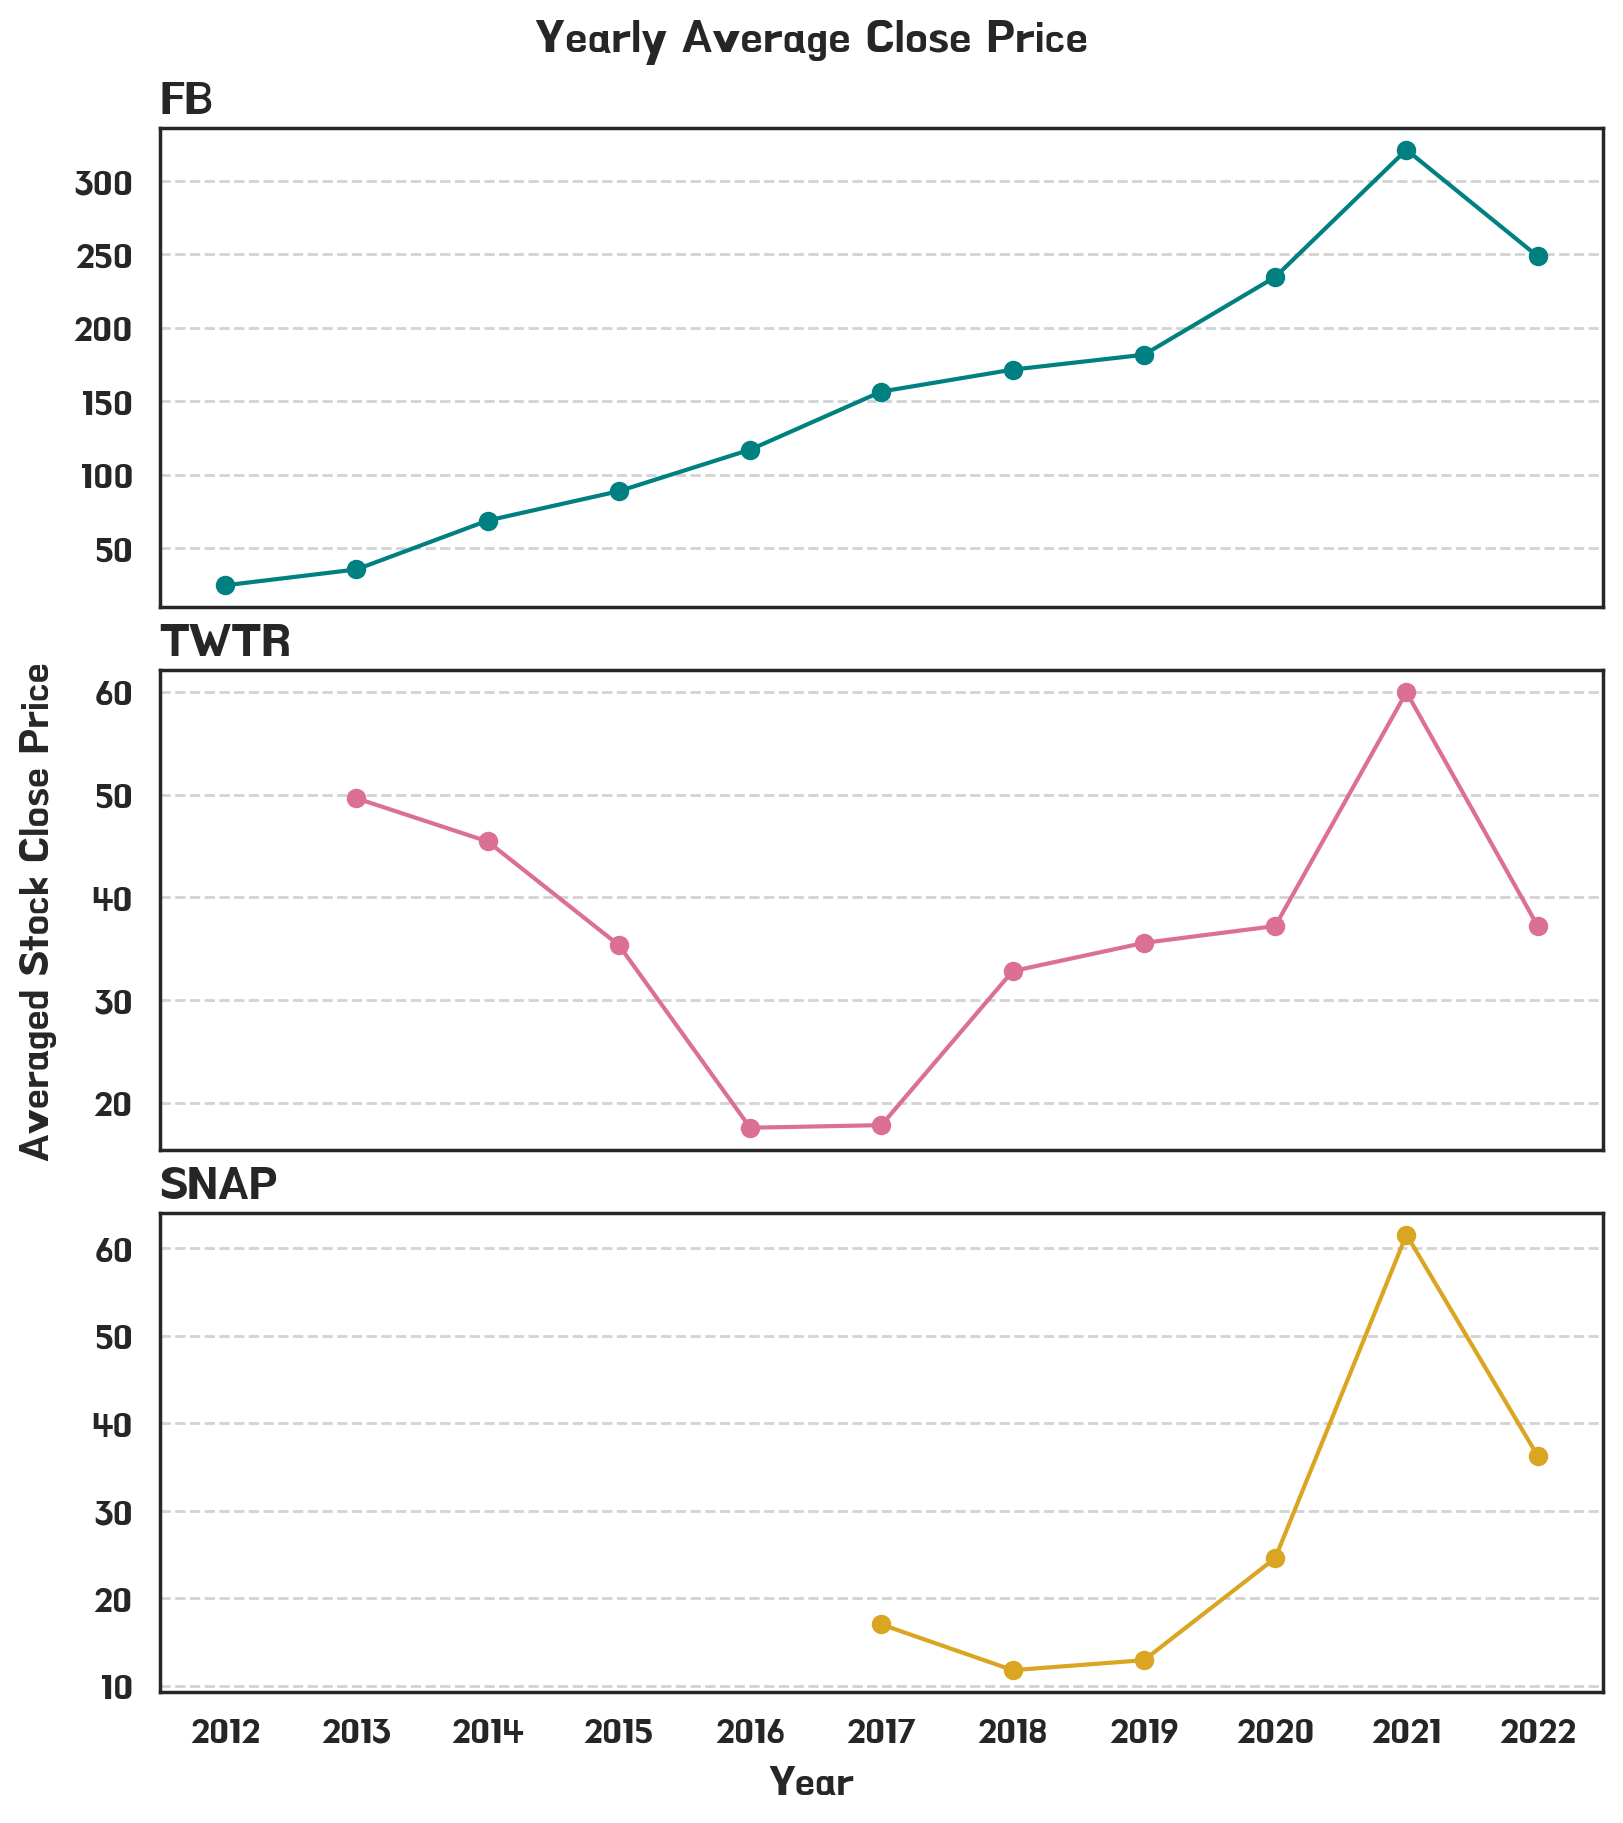

In [43]:
fig, axes = plt.subplots(3, sharex=True, figsize=(8, 9), constrained_layout=True)

axes[0].plot(fb_stock_close['Year'], fb_stock_close['Close'], color='teal', marker='o')
axes[0].set_title('FB', loc='left')
axes[0].grid(axis='y', linestyle='--', color='lightgrey')

axes[1].plot(twtr_stock_close['Year'], twtr_stock_close['Close'], color='palevioletred', marker='o')
axes[1].set_title('TWTR', loc='left')
axes[1].grid(axis='y', linestyle='--', color='lightgrey')


axes[2].plot(snap_stock_close['Year'], snap_stock_close['Close'], color='goldenrod', marker='o')
axes[2].set_title('SNAP', loc='left')
axes[2].grid(axis='y', linestyle='--', color='lightgrey')

fig.suptitle('Yearly Average Close Price', fontsize=16)
fig.supxlabel('Year')
fig.supylabel('Averaged Stock Close Price')

plt.show()